In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [5]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler

X, y = make_blobs(n_samples=50, centers=5, random_state=42, cluster_std=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

mms_train = MinMaxScaler()
mms_test = MinMaxScaler()
X_train_scaled = mms_train.fit_transform(X_train)
X_test_scaled1 = mms_test.fit_transform(X_test)
X_test_scaled2 = mms_train.transform(X_test)

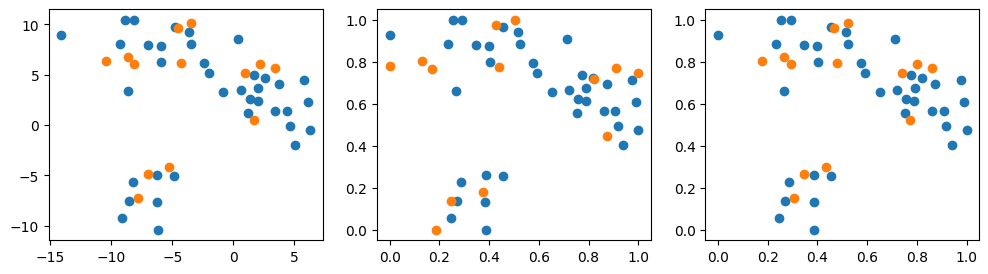

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3)) # 1행 3열 그래프 만들기

axes[0].scatter(X_train[:, 0], X_train[:, 1])
axes[0].scatter(X_test[:, 0], X_test[:, 1])

axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1])
axes[1].scatter(X_test_scaled1[:, 0], X_test_scaled1[:, 1])

axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1])
axes[2].scatter(X_test_scaled2[:, 0], X_test_scaled2[:, 1])

plt.show()

In [8]:
# 데이터 준비
from sklearn.datasets import load_breast_cancer

bc_dataset = load_breast_cancer()
X = bc_dataset['data']
y = bc_dataset['target']

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, stratify=y, random_state=42)

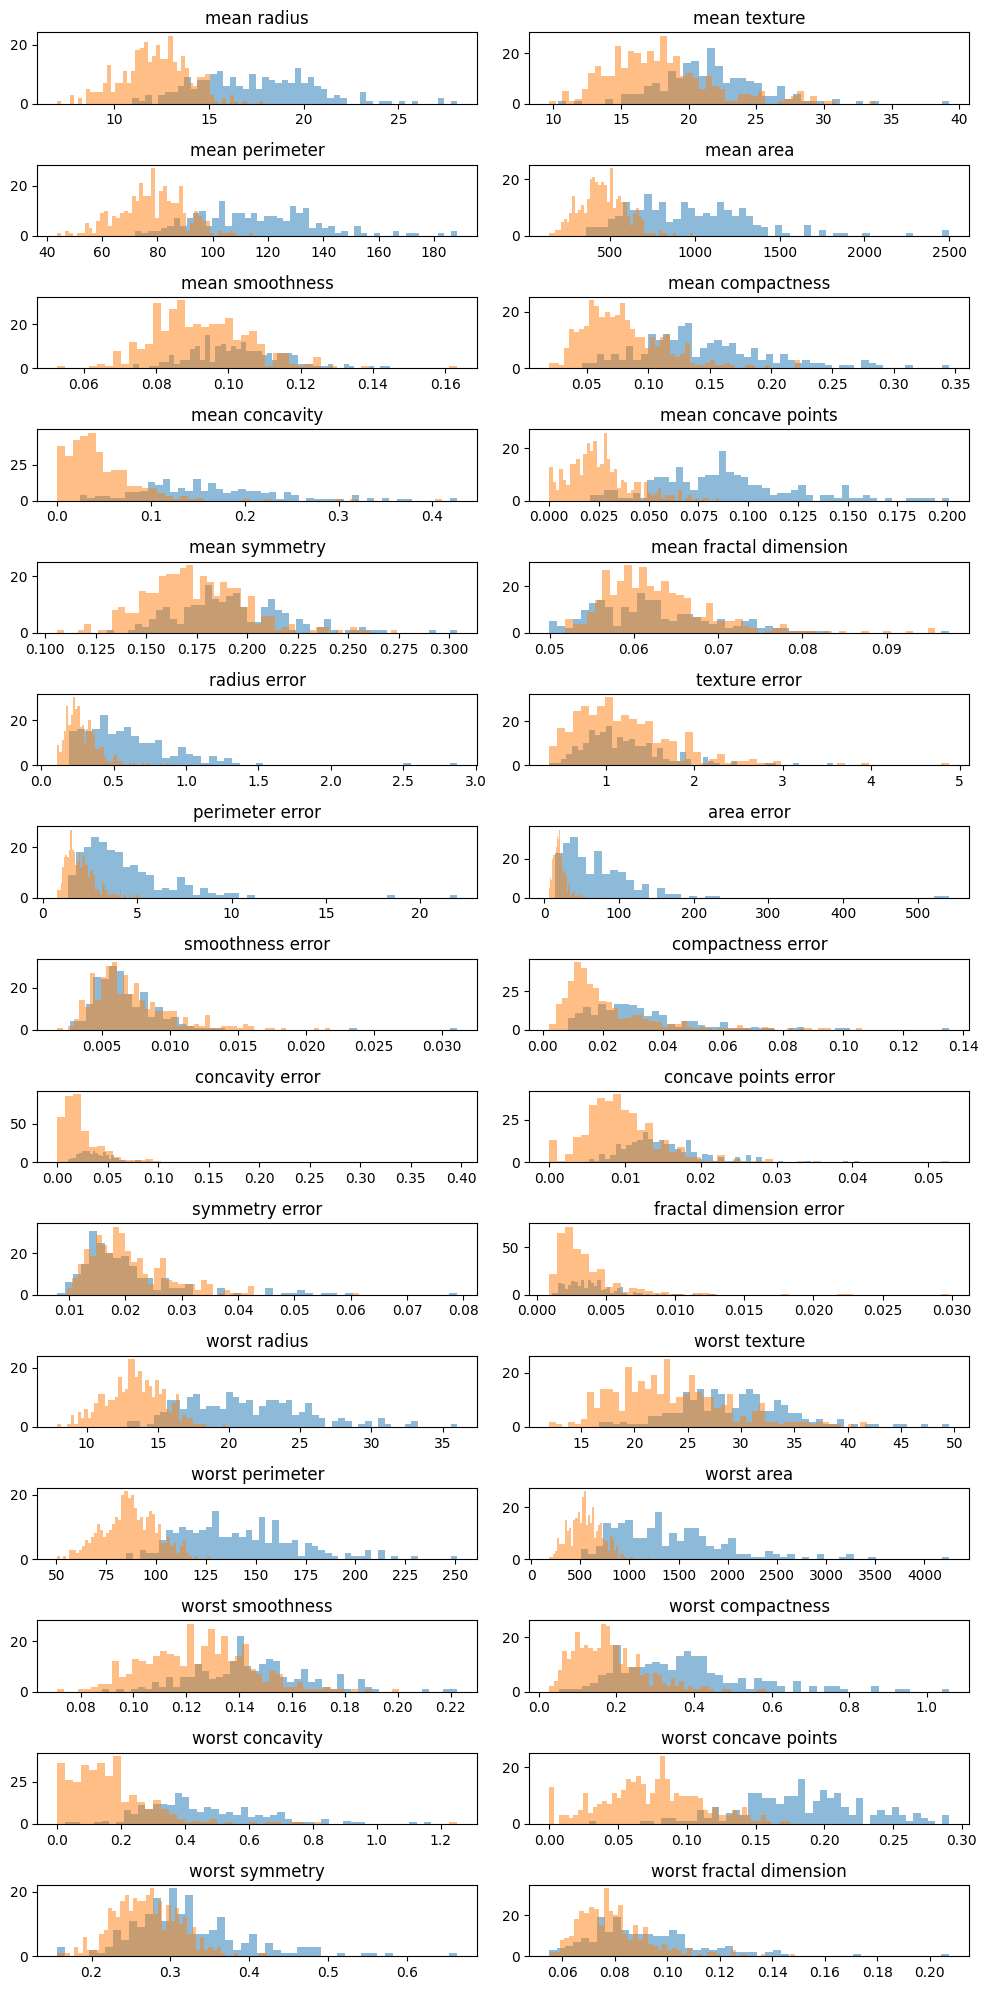

In [9]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
axes = axes.flatten() # n-차원 -> 1차원
for idx, ax in enumerate(axes):
    ax.hist(X[y==0, idx], bins=50, alpha=0.5)
    ax.hist(X[y==1, idx], bins=50, alpha=0.5)
    ax.set_title(bc_dataset['feature_names'][idx])

fig.tight_layout()
plt.show()

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

ssc = StandardScaler()
X_train_scaled = ssc.fit_transform(X_train) # PCA 적용 전에 정규분포로 변환하는 것 권장

pca = PCA(n_components=2)
# pca = PCA(n_components=5)
# pca = PCA(n_components=10)
pca.fit(X_train_scaled)

X_train_pca = pca.transform(X_train_scaled)

X_train.shape, X_train_pca.shape

((426, 30), (426, 2))

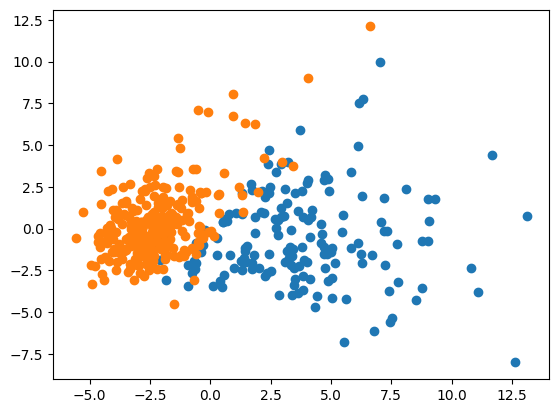

In [34]:
plt.scatter(X_train_pca[y_train==0, 0], X_train_pca[y_train==0, 1])
plt.scatter(X_train_pca[y_train==1, 0], X_train_pca[y_train==1, 1])
plt.show()

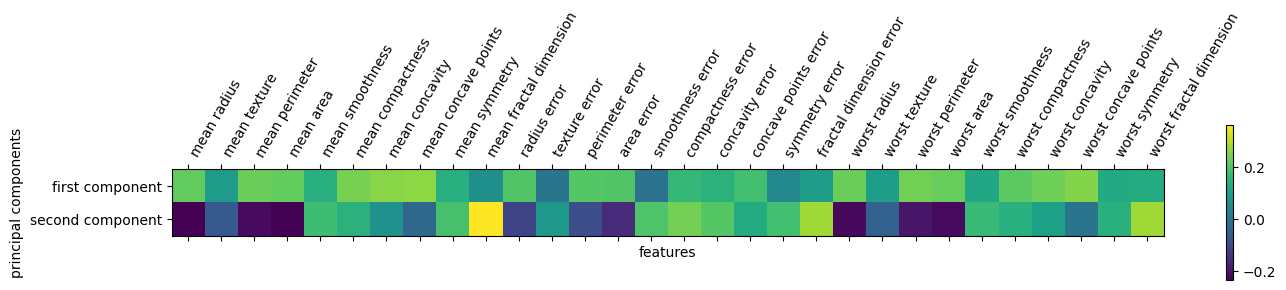

In [39]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["first component", "second component"])
plt.colorbar()
plt.xticks(range(len(bc_dataset['feature_names'])),
           bc_dataset['feature_names'], rotation=60, ha='left')
plt.xlabel("features")
plt.ylabel("principal components")
plt.show()

In [35]:
print( X_train_scaled.shape, pca.components_.shape, X_train_pca.shape )
print( pca.explained_variance_, pca.explained_variance_ratio_ ) 
print( sum(pca.explained_variance_ratio_) )

(426, 30) (10, 30) (426, 10)
[13.19960138  5.86946172  2.82876863  2.04220922  1.6775402   1.20585692
  0.65714239  0.47075049  0.37406275  0.35009583] [0.43895388 0.19518945 0.09407094 0.06791384 0.05578674 0.04010088
 0.02185333 0.01565485 0.01243949 0.01164247]
0.9536058728677441


In [36]:
from sklearn.linear_model import LogisticRegression

logreg1 = LogisticRegression(max_iter=10000)
logreg1.fit(X_train_scaled, y_train)
logreg2 = LogisticRegression(max_iter=10000)
logreg2.fit(X_train_pca, y_train)

logreg1.score(X_train_scaled, y_train), logreg2.score(X_train_pca, y_train)

(0.9882629107981221, 0.9882629107981221)

In [ ]:
# !pip install mglearn

(2000, 3)


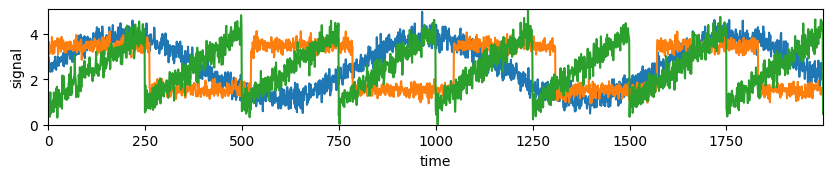

In [45]:
import mglearn
import mglearn.datasets

# mglearn.datasets.make_signals()

S = mglearn.datasets.make_signals()
print(S.shape)
plt.figure(figsize=(10, 1.5))
plt.plot(S, '-')
plt.xlabel("time")
plt.ylabel("signal")
plt.margins(0)

In [46]:
# 원본 데이터를 사용해 100개의 측정 데이터를 만듭니다
A = np.random.RandomState(0).uniform(size=(100, 3))
X = np.dot(S, A.T)
print("측정 데이터 형태:", X.shape)

측정 데이터 형태: (2000, 100)


In [47]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=3, init='nndsvd', random_state=42, max_iter=1000, tol=1e-2)
S_ = nmf.fit_transform(X)
print("복원한 신호 데이터 형태:", S_.shape)



복원한 신호 데이터 형태: (2000, 3)


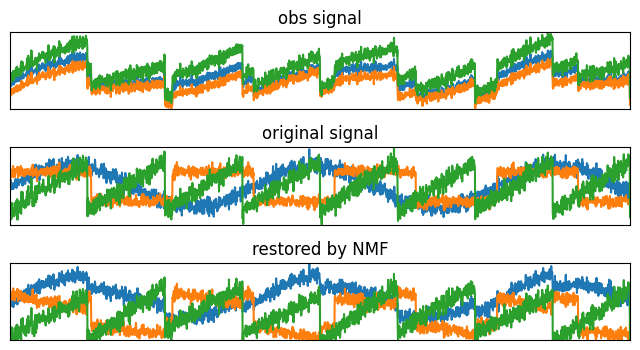

In [49]:
models = [X, S, S_]
names = ['obs signal',
         'original signal',
         'restored by NMF']

fig, axes = plt.subplots(3, figsize=(8, 4), gridspec_kw={'hspace': .5},
                         subplot_kw={'xticks': (), 'yticks': ()})

for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')
    ax.margins(0)